### Pickle Version Change
- Change the original pickle file (list version) to the new one (dict version).

In [ ]:
import os
import pickle


def pickle_from_old_version(model_path):
    with open(model_path, "rb") as f:
        genotype = pickle.load(f)
        model = pickle.load(f)
        hash_key = pickle.load(f)
        running_loss_avg = pickle.load(f)
        val_acc = pickle.load(f)
        test_acc = pickle.load(f)
        best_val_acc = pickle.load(f)
        loss_list = pickle.load(f)
        val_acc_list = pickle.load(f)
    model_save_dict = {
        "genotype": genotype,
        "model": model.to("cpu"),
        "hash_key": hash_key,
        "running_loss_avg": running_loss_avg,
        "val_acc": val_acc,
        "test_acc": test_acc,
        "best_val_acc": best_val_acc,
        "loss_list": loss_list,
        "val_acc_list": val_acc_list,
    }
    with open(model_path, "wb") as f:
        pickle.dump(model_save_dict, f)

# for model_name in model_names:
#     model_path = os.path.join(model_dir,f"{model_name}.pkl")
#     pickle_from_old_version(model_path)


log_dir = "train_output_npenas/npenas_open_domain_darts_narformer/log.txt"
with open(log_dir) as f:
    data = f.readlines()

model_names = []
for line in data:
    # print(line)
    if len(line) == 114:
        model_names.append(line.split()[-1])

# print(model_names)

import os
import pickle

model_dir = "output/train_output_npenas/npenas_open_domain_darts_narformer_tg/model_pkl"
model_names = os.listdir(model_dir)

for model_name in model_names:
    model_path = os.path.join(model_dir, model_name)
    with open(model_path, "rb") as f:
        data = pickle.load(f)
    print(model_name[:-4], data['genotype'], data["val_acc"], data["test_acc"], data["best_val_acc"])


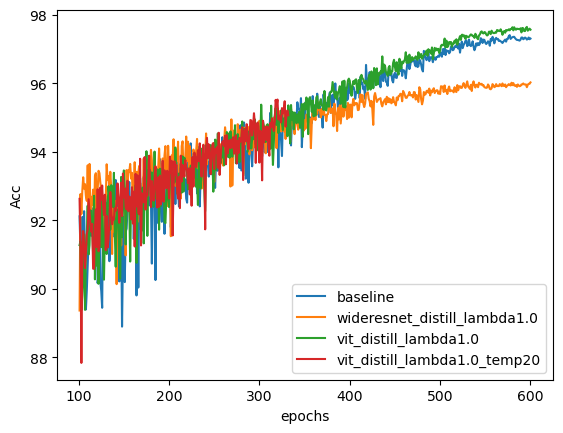

In [2]:
import matplotlib.pyplot as plt


retrain = "retrain_output/darts_cifar10/log.txt"
wideresnet_distill_1 = "retrain_output/darts_cifar10_distill_lambda0.1/log.txt"
wideresnet_distill_2 = "retrain_output/darts_cifar10_distill_lambda1.0/log.txt"
vit_distill_1 = "retrain_output/darts_cifar10_distill_vit_lambda0.1/log.txt"
vit_distill_2 = "retrain_output/darts_cifar10_distill_vit_lambda1.0/log.txt"
vit_distill_3 = "eval-EXP-20230711-071251/log.txt"

def load_test_acc_top1(file_path):
    test_acc_top1 = []
    with open(file_path) as f:
        for line in f.readlines():
            if "test_acc_top1" in line:
                test_acc_top1.append(float(line[-10:]))
    return test_acc_top1

retrain_acc_top1 = load_test_acc_top1(retrain)
wideresnet_distill_1_acc_top1 = load_test_acc_top1(wideresnet_distill_1)
wideresnet_distill_2_acc_top1 = load_test_acc_top1(wideresnet_distill_2)
vit_distill_1_acc_top1 = load_test_acc_top1(vit_distill_1)
vit_distill_2_acc_top1 = load_test_acc_top1(vit_distill_2)
vit_distill_3_acc_top1 = load_test_acc_top1(vit_distill_3)

xs = list(range(1, 602))
start = 100
end = 600
plt.plot(xs[start:end], retrain_acc_top1[start:end], label="baseline")
# plt.plot(xs[start:end], wideresnet_distill_1_acc_top1[start:end], label="wideresnet_distill_lambda0.1")
plt.plot(xs[start:end], wideresnet_distill_2_acc_top1[start:end], label="wideresnet_distill_lambda1.0")
# plt.plot(xs[start:end], vit_distill_1_acc_top1[start:end], label="vit_distill_lambda0.1")
plt.plot(xs[start:end], vit_distill_2_acc_top1[start:end], label="vit_distill_lambda1.0")
plt.plot(xs[start:min(len(vit_distill_3_acc_top1), end)], vit_distill_3_acc_top1[start:min(len(vit_distill_3_acc_top1), end)], label="vit_distill_lambda1.0_temp20")

plt.xlabel("epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [16]:
import os
import pickle

log_dir = "output/train_output_npenas/npenas_open_domain_darts_1/log.txt"
with open(log_dir) as f:
    data = f.readlines()

model_names = []
for line in data:
    if len(line) == 123:
        model_names.append("".join(list(line)[58:-1]))


model_dir = "output/train_output_npenas/npenas_open_domain_darts_2/model_pkl"

best_val_accs = []
for model_name in model_names:
    model_path = os.path.join(model_dir,f"{model_name}.pkl")
    with open(model_path, "rb") as f:
        genotype = pickle.load(f)
        model = pickle.load(f)
        hash_key = pickle.load(f)
        running_loss_avg = pickle.load(f)
        val_acc = pickle.load(f)
        test_acc = pickle.load(f)
        best_val_acc = pickle.load(f)
        best_val_accs.append(best_val_acc)
        loss_list = pickle.load(f)
        val_acc_list = pickle.load(f)

print(best_val_accs)

FileNotFoundError: [Errno 2] No such file or directory: 'output/train_output_npenas/npenas_open_domain_darts_distill/model_pkl/8260cca1783269b44955c6a02b8855083935c137018b054047afaabcf703a177.pkl'

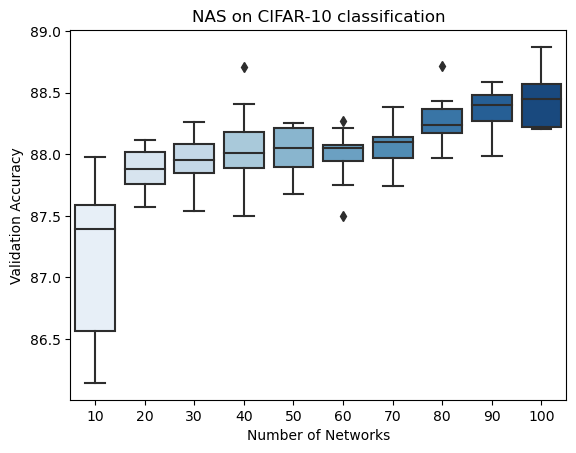

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df = pd.DataFrame({(i+1) * 10:[best_val_accs[j] for j in range(i*10, (i+1)*10)] for i in range(10)})

ax = sns.boxplot(data=df.loc[:, list(range(10,110,10))], palette="Blues")
plt.xlabel("Number of Networks")
plt.ylabel("Validation Accuracy")
plt.title("NAS on CIFAR-10 classification")
plt.show()

In [ ]:
import os
import pickle

log_dir = "output/train_output_npenas/npenas_open_domain_darts_distill/log.txt"
with open(log_dir) as f:
    data = f.readlines()

model_names = []
for line in data:
    if len(line) == 123:
        model_names.append("".join(list(line)[58:-1]))


model_dir = "output/train_output_npenas/npenas_open_domain_darts_distill/model_pkl"

best_val_accs = []
for model_name in model_names:
    model_path = os.path.join(model_dir,f"{model_name}.pkl")
    with open(model_path, "rb") as f:
        genotype = pickle.load(f)
        model = pickle.load(f)
        hash_key = pickle.load(f)
        running_loss_avg = pickle.load(f)
        val_acc = pickle.load(f)
        test_acc = pickle.load(f)
        best_val_acc = pickle.load(f)
        best_val_accs.append(best_val_acc)
        loss_list = pickle.load(f)
        val_acc_list = pickle.load(f)

print(best_val_accs)

In [1]:
import os
import pickle

log_dir = "train_output_npenas/npenas_open_domain_darts_seg/log.txt"
with open(log_dir) as f:
    data = f.readlines()

model_names = []
for line in data:
    if len(line) == 123:
        model_names.append("".join(list(line)[58:-1]))


model_dir = "train_output_npenas/npenas_open_domain_darts_seg/model_pkl"

best_val_accs = []
for model_name in model_names:
    model_path = os.path.join(model_dir,f"{model_name}.pkl")
    with open(model_path, "rb") as f:
        genotype = pickle.load(f)
        model = pickle.load(f)
        hash_key = pickle.load(f)
        running_loss_avg = pickle.load(f)
        val_acc = pickle.load(f)
        test_acc = pickle.load(f)
        best_val_acc = pickle.load(f)
        best_val_accs.append(best_val_acc)
        loss_list = pickle.load(f)
        val_acc_list = pickle.load(f)

print(best_val_accs)

[0.1794249734812719, 0.20089901735080531, 0.17330103074114747, 0.128311853074223, 0.1775839469001337, 0.1756736726482953, 0.18510885339207445, 0.19838667420521836, 0.168643870309818, 0.19547730987788708, 0.19937856424074232, 0.2006057657347135, 0.1974254648195454, 0.18636392089852527, 0.19392825233424368, 0.19827091178279713, 0.2030394302372552, 0.19520114663919788, 0.19310879498903005, 0.19245678941530683, 0.18575208779492994, 0.18578994208318325, 0.20471995046899363, 0.19763351485041752, 0.2054088635861508, 0.20678566727170183, 0.1729287863874728, 0.17641007997141295, 0.20341656348822307, 0.1959361883211721, 0.179194372033049, 0.2026094617104969, 0.20123961101646073, 0.20294593495825317, 0.19839485578376093, 0.19904590464808458, 0.19256026455961123, 0.19487236878988934, 0.19784810901419517, 0.20539650337462045, 0.1973599907993539, 0.20577531871985805, 0.20620044100503981, 0.1945193392001778, 0.20343953535600673, 0.20582486959688504, 0.21159815289125852, 0.20617324486831945, 0.2030893

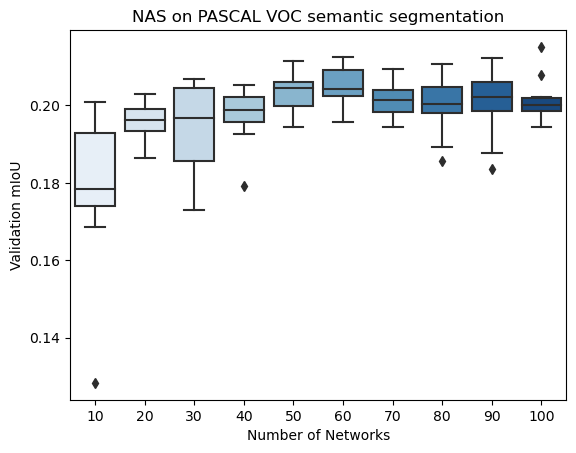

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df = pd.DataFrame({(i+1) * 10:[best_val_accs[j] for j in range(i*10, (i+1)*10)] for i in range(10)})

ax = sns.boxplot(data=df.loc[:, list(range(10,110,10))], palette="Blues")
plt.xlabel("Number of Networks")
plt.ylabel("Validation mIoU")
plt.title("NAS on PASCAL VOC semantic segmentation")
plt.show()

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df = pd.DataFrame({(i+1) * 10:[best_val_accs[j] for j in range(i*10, (i+1)*10)] for i in range(10)})

ax = sns.boxplot(data=df.loc[:, list(range(10,110,10))], palette="Blues")
plt.xlabel("Number of Networks")
plt.ylabel("Validation mIoU")
plt.title("NAS on PASCAL VOC semantic segmentation")
plt.show()

IndexError: list index out of range